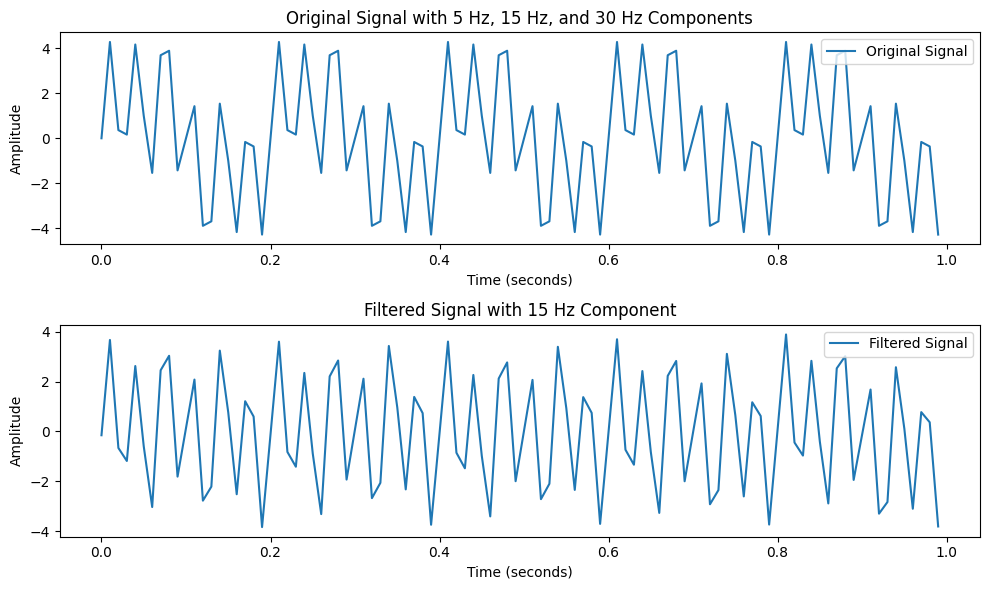

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Parameters
fs = 100  # Sampling frequency (Hz)
T = 1     # Duration of the signal (seconds)
N = fs * T  # Total number of samples

# Time vector
t = np.linspace(0, T, N, endpoint=False)
a1=2
a2=1
a3=3
# Generate the signal with three sinusoidal components
s = a1*np.sin(2 * np.pi * 5 * t) + a2*np.sin(2 * np.pi * 15 * t) + a3*np.sin(2 * np.pi * 30 * t)

# Designing the IIR filter to suppress 5 Hz and 30 Hz frequencies
def butter_bandstop_filter(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='bandstop')
    return b, a

# Set cutoff frequencies (in Hz)
lowcut = 4.5  # Lower cutoff frequency
highcut = 5.5  # Upper cutoff frequency

# Design the filter
b, a = butter_bandstop_filter(lowcut, highcut, fs, order=4)

# Apply the filter to the signal
filtered_signal = filtfilt(b, a, s)

# Plotting the signals
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t, s, label='Original Signal')
plt.title('Original Signal with 5 Hz, 15 Hz, and 30 Hz Components')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, filtered_signal, label='Filtered Signal')
plt.title('Filtered Signal with 15 Hz Component')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()
